# Recommendation System Tourism Place Collaborative Filtering

In [4]:
! pip install surprise
! pip install nlp-id

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Library Import

In [26]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from nlp_id.tokenizer import Tokenizer
from nlp_id.lemmatizer import Lemmatizer
from nltk.corpus import stopwords
from surprise import SVDpp

import nltk
import surprise

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Loading

Load Tourism with ID rating.

In [6]:
dataset_path = "tourism_with_id.csv"
data_df = pd.read_csv(dataset_path, delimiter = ',')

data_df.drop(["Unnamed: 11", "Unnamed: 12"], axis = 1, inplace = True)
data_df.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Load Tourism Rating.

In [7]:
dataset_path = "tourism_rating.csv"
rating_data_df = pd.read_csv(dataset_path, delimiter = ',')

rating_data_df.head(5)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Define Dataset Variables

In [8]:
user_id_field = "User_Id"
place_id_field = "Place_Id"
place_ratings_field = "Place_Ratings"

## Data Visualization

See Count Distribution of each user's rating

User_Id
1      29
2      27
3      29
4      26
5      31
       ..
296    32
297    34
298    29
299    37
300    24
Name: Place_Id, Length: 300, dtype: int64


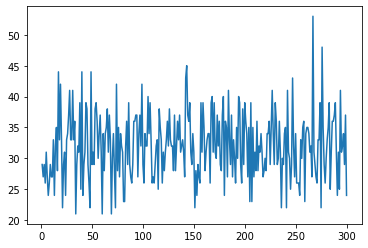

In [9]:
unique_values_rating_data = rating_data_df.groupby(user_id_field)[place_id_field].nunique()
print(unique_values_rating_data)

plt.plot(unique_values_rating_data)

Check how many ratings are there from 1 to 5.

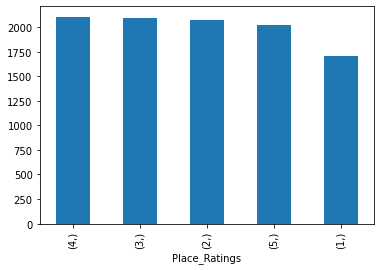

In [21]:
unique_values_rating_data_count = rating_data_df[[place_ratings_field]].value_counts()
unique_values_rating_data_count.plot(kind = 'bar')

See minimum user rating count

In [24]:
user_id_counts = rating_data_df[user_id_field].value_counts()
user_id_counts.describe()

count    300.000000
mean      33.333333
std        5.585656
min       21.000000
25%       29.000000
50%       33.000000
75%       37.000000
max       53.000000
Name: User_Id, dtype: float64

## Data Modelling

Get Sample Data Test Case with lowest rating count

In [29]:
user_id_counts = rating_data_df[user_id_field].value_counts()
minimum_user_id_rating_counts = user_id_counts[user_id_counts == 21]
minimum_user_id_rating_counts

60    21
Name: User_Id, dtype: int64

Determine the threshold to test the user, which place to recommend.

In [ ]:

def perform_collaborative_filtering():


# We set a threshold, so it doesn't give random recommendations if they have less values.
MIN_THRESHOLD_TO_RECOMMEND = 6

min
